In [59]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
from scipy import stats
import statsmodels.api as smf
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [60]:
df=pd.read_csv("C:\\Users\\shree\\Dropbox\\My PC (DESKTOP-R4FIK9U)\\Downloads\\cars_datafinal - Sheet1.csv")

In [61]:
df.isna().sum()

Name                   0
Price                  0
Rating                 0
city                   0
Kilometers             0
Year_of_Purchase       0
Owner                  0
Fuel_Type              0
Transmission        2816
RTO                    0
Insurance           9193
Insurance_Type         0
dtype: int64

In [62]:
df1=df.copy()

<AxesSubplot:>

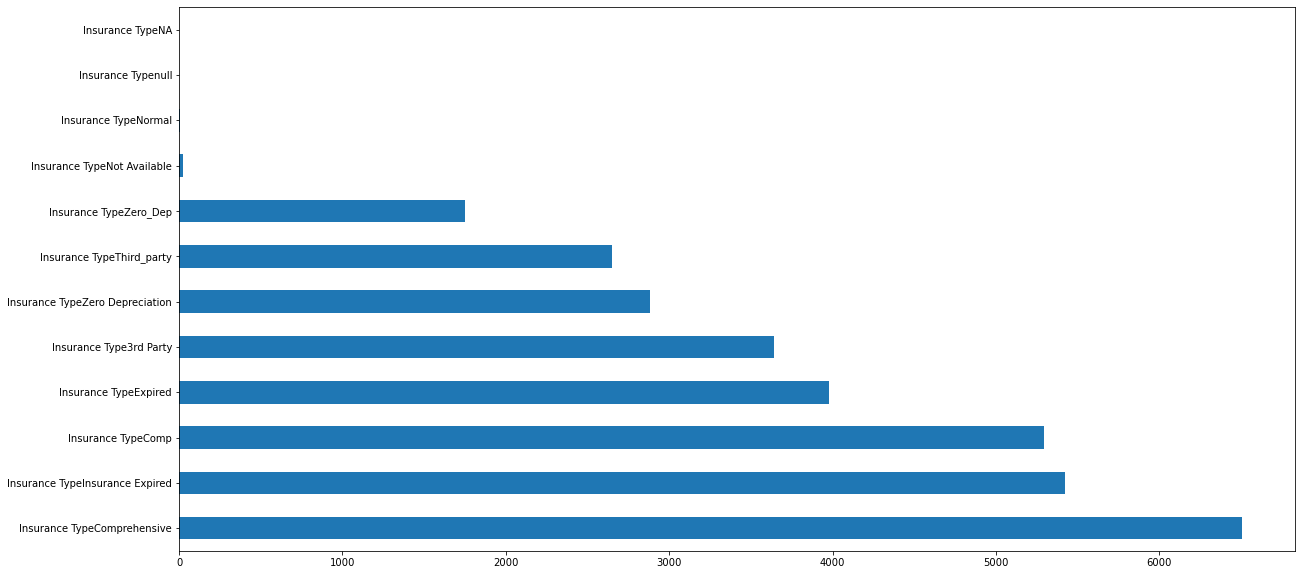

In [63]:
df['Insurance_Type'].value_counts().plot(kind='barh', figsize=(20,10))

<AxesSubplot:>

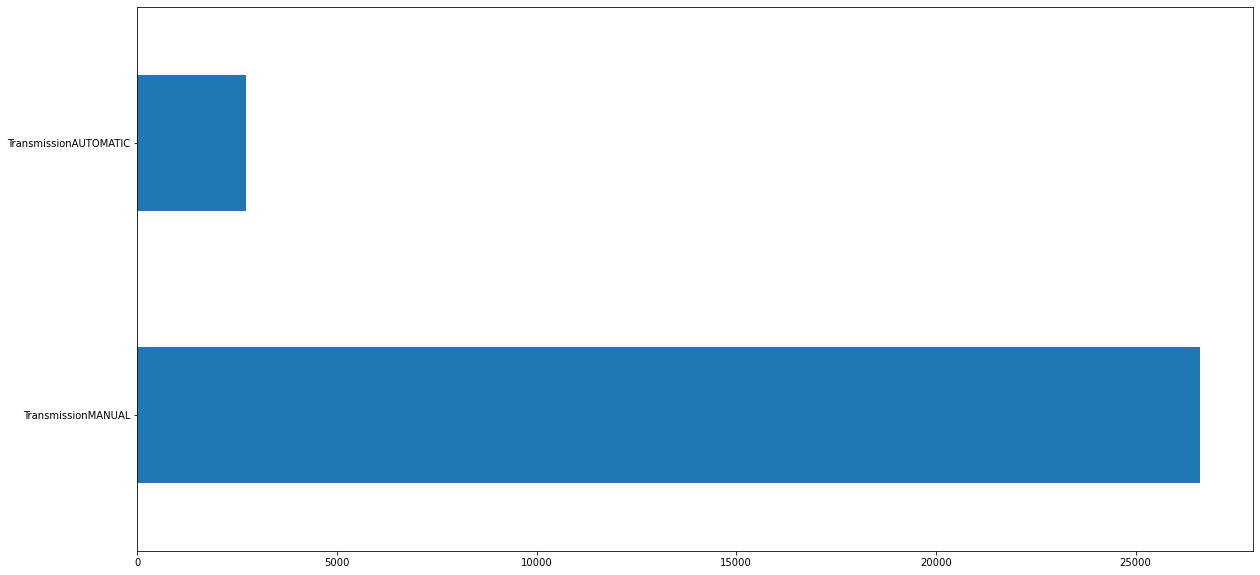

In [64]:
df['Transmission'].value_counts().plot(kind='barh', figsize=(20,10))

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size=0.2, random_state=0)

In [66]:
x_train.head()

,Name,Price,Rating,city,Kilometers,Year_of_Purchase,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type
4252,2008 Tata Indigo CS LS TDI,"₹ 100,000",3.3out of 5,3686,"Kilometers75,671 km",Year of PurchaseAugust 2008,OwnerSecond Owner,FuelDiesel,TransmissionMANUAL,RTOAP09,Insurance3/9/2021,Insurance TypeComp
8283,2009 Hyundai Santro Xing GLS,"₹ 201,599",4.2out of 5,4709,"Kilometers102,210 km",Year of PurchaseSeptember 2009,OwnerThird Owner,FuelPetrol,TransmissionMANUAL,RTOKA03,Insurance21/5/2021,Insurance TypeExpired
2395,2017 Honda City V AT,"₹ 900,000",4.9out of 5,3686,"Kilometers23,304 km",Year of PurchaseMay 2017,OwnerFirst Owner,FuelPetrol,TransmissionAUTOMATIC,RTOTS10,NaN,Insurance TypeInsurance Expired
12065,2015 Maruti Celerio ZXI AMT,"₹ 350,000",4.1out of 5,4709,"Kilometers90,263 km",Year of PurchaseAugust 2015,OwnerSecond Owner,FuelPetrol,TransmissionAUTOMATIC,RTOKA51,Insurance28/8/2021,Insurance TypeComprehensive
11598,2015 Ford Ecosport 1.5 TITANIUM TI VCT AT,"₹ 690,000",4.3out of 5,4709,"Kilometers89,460 km",Year of PurchaseJanuary 2015,OwnerSecond Owner,FuelPetrol,TransmissionAUTOMATIC,RTOKA03,Insurance20/9/2021,Insurance TypeComprehensive


In [67]:
x_train=x_train.reset_index(drop=True)

In [68]:
x_test=x_test.reset_index(drop=True)

In [69]:
x_train["Rating"] = x_train["Rating"].str.split(' ').str.slice(0,1).str.join(' ')
x_train["Rating"] =  [j[:1] for j in x_train['Rating']]
x_train['Rating']=x_train['Rating'].astype(float)



In [70]:
x_test["Rating"] = x_test["Rating"].str.split(' ').str.slice(0,1).str.join(' ')
x_test["Rating"] =  [z[:1] for z in x_test['Rating']]
x_test['Rating']=x_test['Rating'].astype(float)



In [71]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25726 entries, 0 to 25725
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              25726 non-null  object 
 1   Price             25726 non-null  object 
 2   Rating            25726 non-null  float64
 3   city              25726 non-null  int64  
 4   Kilometers        25726 non-null  object 
 5   Year_of_Purchase  25726 non-null  object 
 6   Owner             25726 non-null  object 
 7   Fuel_Type         25726 non-null  object 
 8   Transmission      23489 non-null  object 
 9   RTO               25726 non-null  object 
 10  Insurance         18404 non-null  object 
 11  Insurance_Type    25726 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 2.4+ MB


In [72]:
x_train['Name'] = [z[5:] for z in x_train['Name']]
x_train['Name']=x_train['Name'].str.split(' ').str.slice(0,2).str.join(' ')
x_train['Name'].head(6)

0       Tata Indigo
1    Hyundai Santro
2        Honda City
3    Maruti Celerio
4     Ford Ecosport
5       Maruti Omni
Name: Name, dtype: object

In [73]:
x_test['Name'] = [z[5:] for z in x_test['Name']]
x_test['Name']=x_test['Name'].str.split(' ').str.slice(0,2).str.join(' ')
x_test['Name'].head(6)

0         Skoda Fabia
1    Volkswagen Vento
2         Skoda Rapid
3       Mahindra Xylo
4       Hyundai Grand
5       Hyundai Verna
Name: Name, dtype: object

In [74]:
x_train['Year_of_Purchase'] = [z[-4:] for z in x_train['Year_of_Purchase']]
x_train['Year_of_Purchase']=pd.to_numeric(x_train['Year_of_Purchase'])

In [75]:
x_test['Year_of_Purchase'] = [z[-4:] for z in x_test['Year_of_Purchase']]
x_test['Year_of_Purchase']=pd.to_numeric(x_test['Year_of_Purchase'])

In [76]:
x_train['current_year']=2021
x_train['no_year']=x_train['current_year']-x_train['Year_of_Purchase']
x_train.drop(['Year_of_Purchase','current_year'],axis=1,inplace=True)

In [77]:
x_test['current_year']=2021
x_test['no_year']=x_test['current_year']-x_test['Year_of_Purchase']
x_test.drop(['Year_of_Purchase','current_year'],axis=1,inplace=True)

In [78]:
x_train['Kilometers']=x_train['Kilometers'].str.split(' ').str.get(0).str.replace(',',"")
x_train['Kilometers'] = x_train['Kilometers'].str[10:]
x_train["Kilometers"] = x_train["Kilometers"].astype(str).astype(int)
x_train['Kilometers'].head()

0     75671
1    102210
2     23304
3     90263
4     89460
Name: Kilometers, dtype: int32

In [79]:
x_test['Kilometers']=x_test['Kilometers'].str.split(' ').str.get(0).str.replace(',',"")
x_test['Kilometers'] = x_test['Kilometers'].str[10:]
x_test["Kilometers"] = x_test["Kilometers"].astype(str).astype(int)
x_test['Kilometers'].head()

0    126951
1    129982
2     72479
3     61514
4     90217
Name: Kilometers, dtype: int32

In [80]:
x_train['Insurance_Type']=x_train['Insurance_Type'].replace(['Insurance TypeExpired','Insurance TypeInsurance Expired'],'Insurance_Expired')
x_train['Insurance_Type']=x_train['Insurance_Type'].replace(['Insurance TypeNot Available','Insurance Typenull','Insurance TypeNA','Insurance TypeNormal','Insurance TypeComp','Insurance TypeComprehensive'],'Comprehensive')
x_train['Insurance_Type']=x_train['Insurance_Type'].replace(['Insurance TypeZero Depreciation','Insurance TypeZero_Dep'],'Zero_depreciation')
x_train['Insurance_Type']=x_train['Insurance_Type'].replace(['Insurance Type3rd Party','Insurance TypeThird_party'],'Third_party')


In [81]:
x_test['Insurance_Type']=x_test['Insurance_Type'].replace(['Insurance TypeExpired','Insurance TypeInsurance Expired'],'Insurance_Expired')
x_test['Insurance_Type']=x_test['Insurance_Type'].replace(['Insurance TypeNot Available','Insurance Typenull','Insurance TypeNA','Insurance TypeNormal','Insurance TypeComp','Insurance TypeComprehensive'],'Comprehensive')
x_test['Insurance_Type']=x_test['Insurance_Type'].replace(['Insurance TypeZero Depreciation','Insurance TypeZero_Dep'],'Zero_depreciation')
x_test['Insurance_Type']=x_test['Insurance_Type'].replace(['Insurance Type3rd Party','Insurance TypeThird_party'],'Third_party')


In [82]:
x_train['Owner']=x_train['Owner'].replace(['OwnerSixth Owner','OwnerFourth Owner', 'OwnerFifth Owner',
       'OwnerEighth Owner', 'OwnerSeventh Owner', 'OwnerNinth Owner',
       'OwnerTenth Owner'],'fourth_Owner_and_above')
x_train['Owner']=x_train['Owner'].replace(['OwnerSecond Owner', 'OwnerThird Owner', 'OwnerFirst Owner'],['Second_Owner','Third_owner','First_Owner'])

In [83]:
x_test['Owner']=x_test['Owner'].replace(['OwnerSixth Owner','OwnerFourth Owner', 'OwnerFifth Owner',
       'OwnerEighth Owner', 'OwnerSeventh Owner', 'OwnerNinth Owner',
       'OwnerTenth Owner'],'fourth_Owner_and_above')
x_test['Owner']=x_test['Owner'].replace(['OwnerSecond Owner', 'OwnerThird Owner', 'OwnerFirst Owner'],['Second_Owner','Third_owner','First_Owner'])

In [84]:
x_train["Transmission"] = x_train["Transmission"].str[12:]
x_train['Transmission']=x_train['Transmission'].fillna('AUTOMATIC')
x_train['Transmission'].isna().sum()

0

In [85]:
x_test["Transmission"] =x_test["Transmission"].str[12:]
x_test['Transmission']=x_test['Transmission'].fillna('AUTOMATIC')
x_test['Transmission'].isna().sum()

0

In [86]:
x_train["Price"] =  [z[1:] for z in x_train["Price"]]
x_train["Price"]=x_train["Price"].str.replace(',','')
x_train["Price"]=x_train['Price'].astype(int)

In [87]:
x_test["Price"] =  [z[1:] for z in x_test["Price"]]
x_test["Price"]=x_test["Price"].str.replace(',','')
x_test["Price"]=x_test['Price'].astype(int)

In [88]:
x_train.head()

,Name,Price,Rating,city,Kilometers,Owner,Fuel_Type,Transmission,RTO,Insurance,Insurance_Type,no_year
0,Tata Indigo,100000,3.0,3686,75671,Second_Owner,FuelDiesel,MANUAL,RTOAP09,Insurance3/9/2021,Comprehensive,13
1,Hyundai Santro,201599,4.0,4709,102210,Third_owner,FuelPetrol,MANUAL,RTOKA03,Insurance21/5/2021,Insurance_Expired,12
2,Honda City,900000,4.0,3686,23304,First_Owner,FuelPetrol,AUTOMATIC,RTOTS10,NaN,Insurance_Expired,4
3,Maruti Celerio,350000,4.0,4709,90263,Second_Owner,FuelPetrol,AUTOMATIC,RTOKA51,Insurance28/8/2021,Comprehensive,6
4,Ford Ecosport,690000,4.0,4709,89460,Second_Owner,FuelPetrol,AUTOMATIC,RTOKA03,Insurance20/9/2021,Comprehensive,6


In [89]:
x_train.drop(['Insurance'],axis=1,inplace=True)
x_train.drop(['RTO'],axis=1,inplace=True)


In [90]:

x_train=x_train[x_train['no_year']<30]
x_train=x_train[x_train['Price']<3e6]
x_train=x_train[x_train['Kilometers']<3e5].reset_index(drop=True)

In [91]:

x_test=x_test[x_test['no_year']<30]
x_test=x_test[x_test['Price']<3e6]
x_test=x_test[x_test['Kilometers']<3e5].reset_index(drop=True)

In [92]:
x_test.drop(['Insurance'],axis=1,inplace=True)
x_test.drop(['RTO'],axis=1,inplace=True)


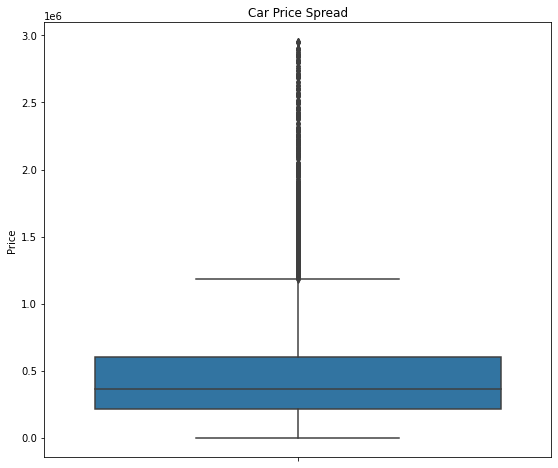

In [101]:
plt.figure(figsize=(20,8))


plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=x_train.Price)

plt.show()

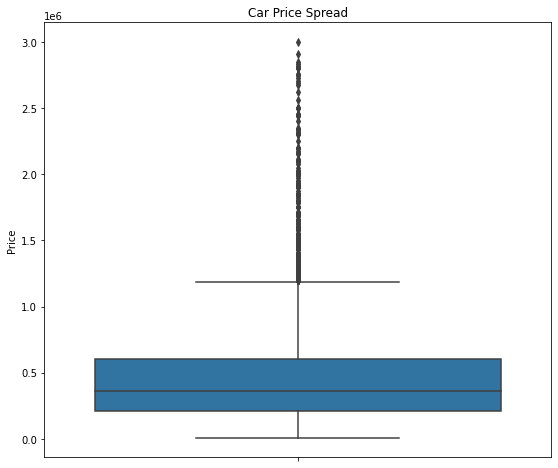

In [100]:
plt.figure(figsize=(20,8))



plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=x_test.Price)
plt.show()

# FuelHybrid is having higher average price than all other fuel type variants

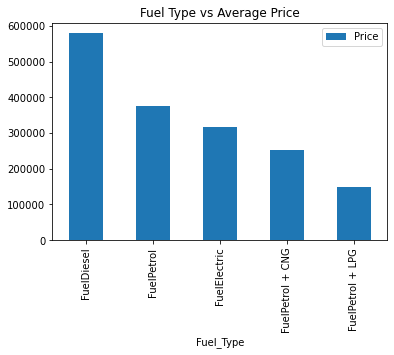

In [95]:
df2 = pd.DataFrame(x_train.groupby(['Fuel_Type'])['Price'].mean().sort_values(ascending = False))
df2.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

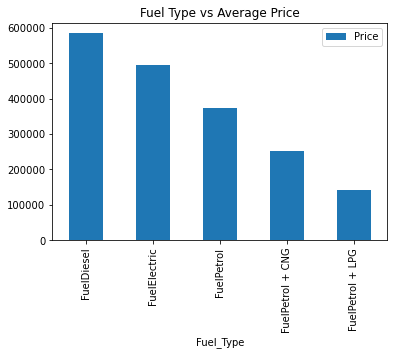

In [98]:
df2 = pd.DataFrame(x_test.groupby(['Fuel_Type'])['Price'].mean().sort_values(ascending = False))
df2.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

In [93]:
bin=[0,1.8e5,3e5,5e5,15e5,10e6]
group=['low_budget','budget','economy','high_end','premium']
x_train['Car_category']=pd.cut(x_train['Price'],bin,labels=group)

In [96]:
bin=[0,1.8e5,3e5,5e5,15e5,10e6]
group=['low_budget','budget','economy','high_end','premium']
x_test['Car_category']=pd.cut(x_test['Price'],bin,labels=group)

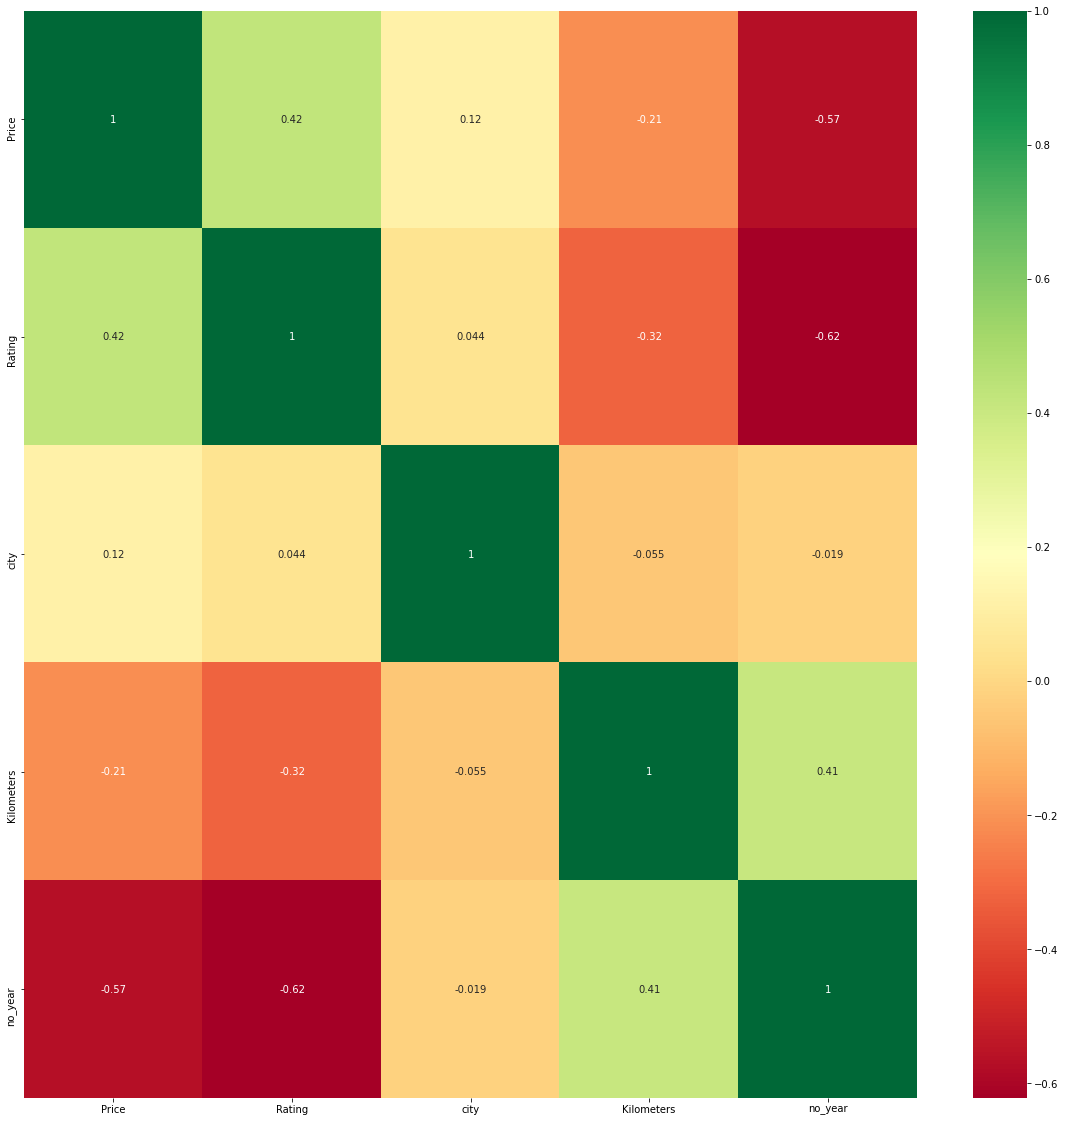

In [103]:
corrmat = x_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(x_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

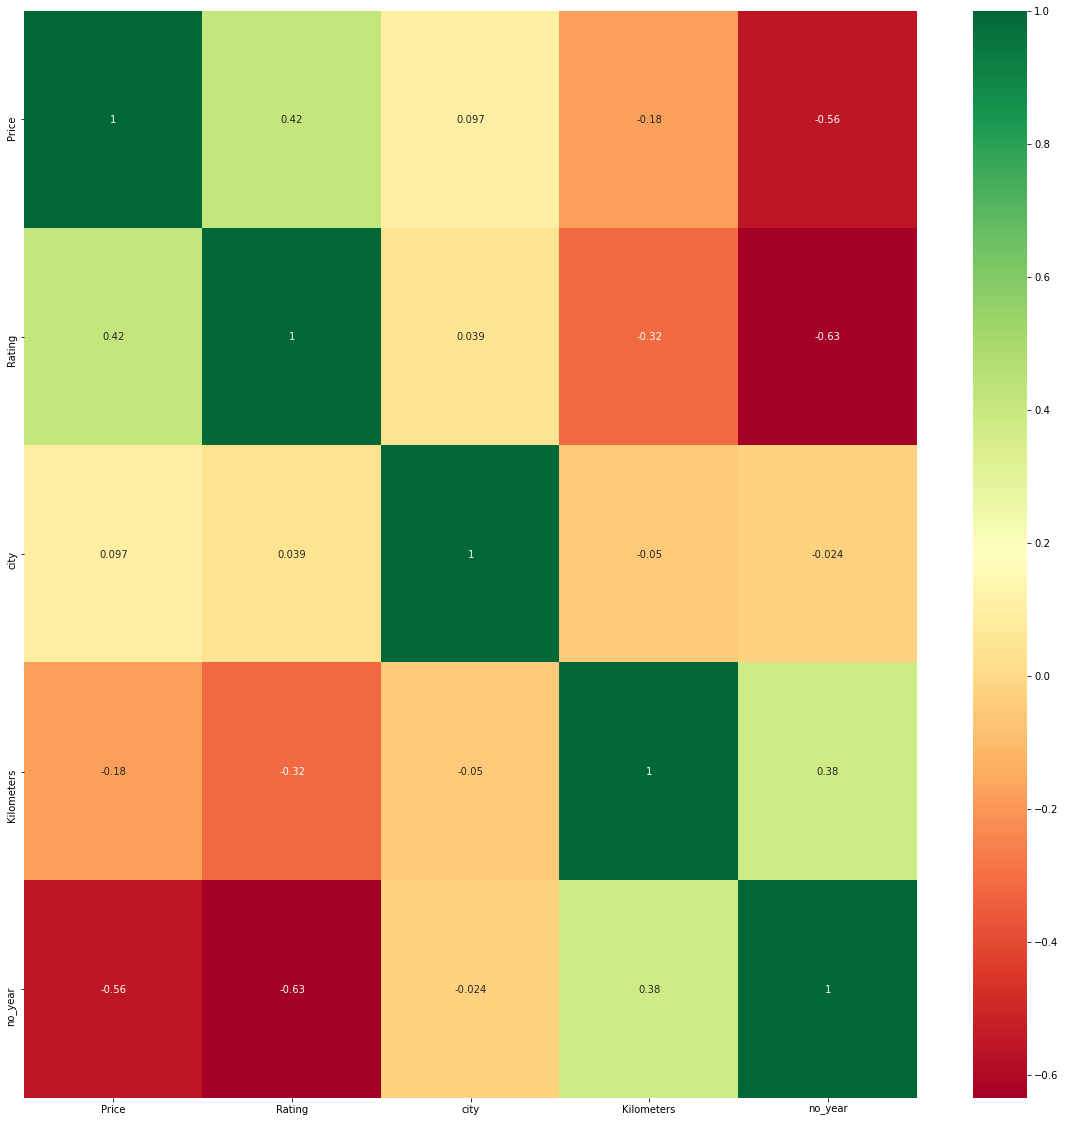

In [104]:
corrmat = x_test.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(x_test[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [97]:
a=x_train

In [36]:
b=x_test

In [37]:
x_train.drop(['Name'],axis=1,inplace=True)

In [38]:
x_test.drop(['Name'],axis=1,inplace=True)

In [39]:
A=x_train.copy()
x_train=A.drop(['Price'],axis=1)
y_train=A['Price']

In [40]:
B=x_test.copy()
x_test=B.drop(['Price'],axis=1)
y_test=B['Price']

# ENCODING

In [41]:
dummy=pd.get_dummies(x_train.Owner)
x_train=pd.concat([x_train,dummy],axis=1)
x_train.drop('Owner',axis=1,inplace=True)
x_train.drop('fourth_Owner_and_above',axis=1,inplace=True)

dummy=pd.get_dummies(x_train.Fuel_Type)
x_train=pd.concat([x_train,dummy],axis=1)
x_train.drop('Fuel_Type',axis=1,inplace=True)
x_train.drop('FuelElectric',axis=1,inplace=True)

dummy=pd.get_dummies(x_train.Insurance_Type)
x_train=pd.concat([x_train,dummy],axis=1)
x_train.drop('Insurance_Type',axis=1,inplace=True)
x_train.drop('Zero_depreciation',axis=1,inplace=True)

dummy=pd.get_dummies(x_train.Transmission)
x_train=pd.concat([x_train,dummy],axis=1)
x_train.drop('Transmission',axis=1,inplace=True)

dummy=pd.get_dummies(x_train.Car_category)
x_train=pd.concat([x_train,dummy],axis=1)
x_train.drop('Car_category',axis=1,inplace=True)
x_train.drop('premium',axis=1,inplace=True)

In [42]:
dummy=pd.get_dummies(x_test.Owner)
x_test=pd.concat([x_test,dummy],axis=1)
x_test.drop('Owner',axis=1,inplace=True)
x_test.drop('fourth_Owner_and_above',axis=1,inplace=True)

dummy=pd.get_dummies(x_test.Fuel_Type)
x_test=pd.concat([x_test,dummy],axis=1)
x_test.drop('Fuel_Type',axis=1,inplace=True)
x_test.drop('FuelElectric',axis=1,inplace=True)

dummy=pd.get_dummies(x_test.Insurance_Type)
x_test=pd.concat([x_test,dummy],axis=1)
x_test.drop('Insurance_Type',axis=1,inplace=True)
x_test.drop('Zero_depreciation',axis=1,inplace=True)

dummy=pd.get_dummies(x_test.Transmission)
x_test=pd.concat([x_test,dummy],axis=1)
x_test.drop('Transmission',axis=1,inplace=True)

dummy=pd.get_dummies(x_test.Car_category)
x_test=pd.concat([x_test,dummy],axis=1)
x_test.drop('Car_category',axis=1,inplace=True)
x_test.drop('premium',axis=1,inplace=True)

# modelling

In [51]:
#Linear
from sklearn.linear_model import LinearRegression
ml1=LinearRegression()
ml1.fit(x_train,y_train)
pred_test=ml1.predict(x_test)
pred_train=ml1.predict(x_train)
print(r2_score(y_train,pred_train))
print(r2_score(y_test,pred_test))

0.8668980308717911
0.8586470247292888


In [52]:
##poly
from sklearn.preprocessing import PolynomialFeatures
poly_convert=PolynomialFeatures(degree=4,include_bias=False)
poly=poly_convert.fit_transform(x_train,x_test)
from sklearn.linear_model import LinearRegression
ml2=LinearRegression()
ml2.fit(x_train,y_train)
pred_test=ml2.predict(x_test)
pred_train=ml2.predict(x_train)
print(r2_score(y_train,pred_train))
print(r2_score(y_test,pred_test))   
   

0.8668980308717911
0.8586470247292888


In [53]:
##decision
from sklearn.tree import DecisionTreeRegressor
ml3=DecisionTreeRegressor()
ml3.fit(x_train,y_train)
pred_test=ml3.predict(x_test)
pred_train=ml3.predict(x_train)
train=np.abs(r2_score(y_train,pred_train))
print(train)
test=np.abs(r2_score(y_test,pred_test))
print(test)

0.9999999440052374
0.766460085779584


In [54]:
    #RF
    from sklearn.ensemble import RandomForestRegressor
    ml4 = RandomForestRegressor(n_estimators=11, random_state=33)
    ml4.fit(x_train,y_train)
    r_test_p=ml4.predict(x_test)
    r_train_p=ml4.predict(x_train)
    print(r2_score(y_train,r_train_p))
    print(r2_score(y_test,r_test_p))

0.9762354528211886
0.8563556610584256


In [49]:
#Ridge
from sklearn.linear_model import Ridge
ml5=Ridge()
ml5.fit(x_train,y_train)
pred_test=ml5.predict(x_test)
pred_train=ml5.predict(x_train)
train=np.abs(r2_score(y_train,pred_train))
print(train)
test=np.abs(r2_score(y_test,pred_test))
print(test)

0.8668781429648285
0.8585645196030062


In [50]:
#XGB
import xgboost as xgb
ml6=xgb.XGBRegressor()
ml6.fit(x_train,y_train)
pred_test=ml6.predict(x_test)
pred_train=ml6.predict(x_train)
train=np.abs(r2_score(y_train,pred_train))
print(train)
test=np.abs(r2_score(y_test,pred_test))
print(test)

0.9213105615503937
0.8697421566359633


In [ ]:
import pickle
pickle.dump(ml1,open('model_ml.pkl','wb'))
ml_model=pickle.load(open('model_ml.pkl','rb'))